1.Data load
2.Missing values
3.Fill
4.Check balance datatypes similar
5.balance numbers
6.scale

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv("D:/4th year/Machine Learning/Data.csv")
print(df)

   Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
4  Germany  40.0      NaN       Yes
5   France  35.0  58000.0       Yes
6    Spain   NaN  52000.0        No
7   France  48.0  79000.0       Yes
8  Germany  50.0  83000.0        No
9   France  37.0  67000.0       Yes


In [3]:
z = df['Salary'].median()
print(z)
df['Salary'].fillna(z,inplace = True)
print(df)

61000.0
   Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
4  Germany  40.0  61000.0       Yes
5   France  35.0  58000.0       Yes
6    Spain   NaN  52000.0        No
7   France  48.0  79000.0       Yes
8  Germany  50.0  83000.0        No
9   France  37.0  67000.0       Yes


In [4]:
z = df['Age'].median()
print(z)
df['Age'].fillna(z, inplace=True)
print(df)

38.0
   Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
4  Germany  40.0  61000.0       Yes
5   France  35.0  58000.0       Yes
6    Spain  38.0  52000.0        No
7   France  48.0  79000.0       Yes
8  Germany  50.0  83000.0        No
9   France  37.0  67000.0       Yes


In [5]:
x = df.iloc[:, :-1].values # iloc for integer-based indexing & loc for label-based indexing, -1 for except last testing data others are in x
y = df.iloc[:, 3].values # also can give df.iloc[:, -1].values (: for all rows and -1 for last column)
print(y)

['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


In [6]:
# converting string to numbers (country names to numrical)
from sklearn.preprocessing import LabelEncoder # importing library

#LabelEncoder_X = LabelEncoder() # function which is used to perform this action so to store in variable

x[:, 0] = LabelEncoder().fit_transform(x[:, 0])  # country is in 1st column
print(x) # successfully assigned names of countries to numbers

[[0 44.0 72000.0]
 [2 27.0 48000.0]
 [1 30.0 54000.0]
 [2 38.0 61000.0]
 [1 40.0 61000.0]
 [0 35.0 58000.0]
 [2 38.0 52000.0]
 [0 48.0 79000.0]
 [1 50.0 83000.0]
 [0 37.0 67000.0]]


In [7]:
y = LabelEncoder().fit_transform(y) # no need to use iloc cause y contains only 1 column
print(y)

[0 1 0 0 1 1 0 1 0 1]


In [8]:
# converting to same scale, cause age & salary unit is different
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit_transform(x)
print(sc_X)

[[-1.08347268  0.76973439  0.77256767]
 [ 1.32424438 -1.69922498 -1.40879986]
 [ 0.12038585 -1.26352627 -0.86345798]
 [ 1.32424438 -0.10166303 -0.22722578]
 [ 0.12038585  0.18880278 -0.22722578]
 [-1.08347268 -0.53736175 -0.49989673]
 [ 1.32424438 -0.10166303 -1.04523861]
 [-1.08347268  1.35066601  1.40879986]
 [ 0.12038585  1.64113182  1.77236112]
 [-1.08347268 -0.24689594  0.3181161 ]]


In [9]:
# as above values contains negative, we use minmax to get all positive
from sklearn.preprocessing import MinMaxScaler
min_max_scaler_X = MinMaxScaler().fit_transform(sc_X) # sc_X contains -ve values, so this is given to transform
print(min_max_scaler_X) # formula used:- normalized value = (value - min) / (max - min)

[[0.         0.73913043 0.68571429]
 [1.         0.         0.        ]
 [0.5        0.13043478 0.17142857]
 [1.         0.47826087 0.37142857]
 [0.5        0.56521739 0.37142857]
 [0.         0.34782609 0.28571429]
 [1.         0.47826087 0.11428571]
 [0.         0.91304348 0.88571429]
 [0.5        1.         1.        ]
 [0.         0.43478261 0.54285714]]


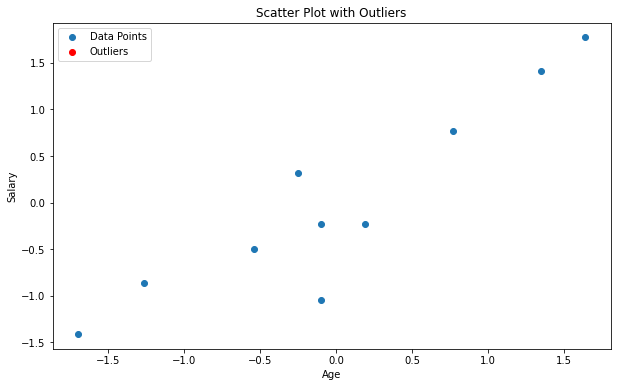

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy import stats

scaler = StandardScaler()
scaled_data = scaler.fit_transform(min_max_scaler_X)

z_scores = stats.zscore(scaled_data)

threshold = 3

outliers = np.where(np.abs(z_scores) > threshold)[0]


plt.figure(figsize=(10, 6))
plt.scatter(scaled_data[:, 1], scaled_data[:, 2], label='Data Points')

# Mark outliers on the plot
plt.scatter(scaled_data[outliers, 0],
            scaled_data[outliers, 1], c='red', label='Outliers')

plt.title('Scatter Plot with Outliers')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.show()

# Remove outliers
filtered_data = np.delete(scaled_data, outliers, axis=0)
# Now 'filtered_data' contains the data with outliers removed